In [1]:
from catchment import create_pristine_catchment, create_catchment, netcdf_from_dict
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from tools import write_AsciiGrid
import os
today = date.today()

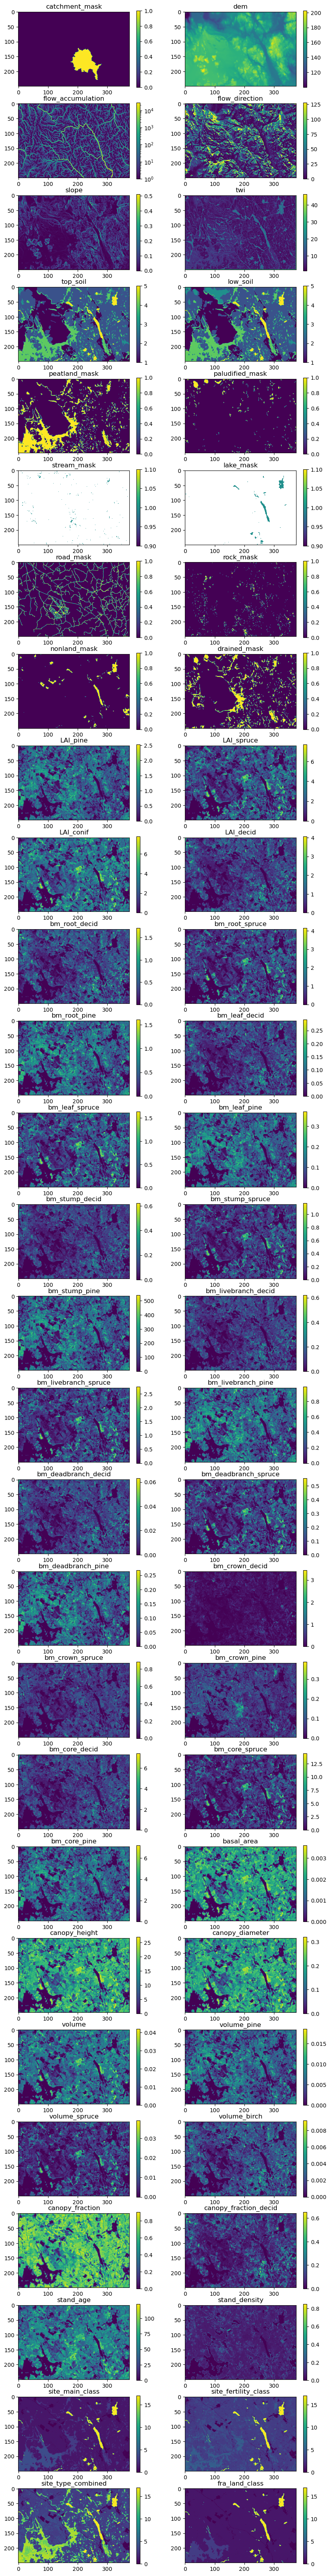

In [2]:
fpath = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/'
catch, units, meta = create_catchment(fpath, set_non_forest_as='ei')

In [ ]:
folder = r'/projappl/project_2000908/nousu/SpaFHy_v2.0/testcase_input/hyytiala_32_new/'
if not os.path.exists(folder):
    os.makedirs(folder)
variables = ['catchment_mask', 'dem', 'flow_accumulation', 'slope', 'twi', 
             'top_soil', 'low_soil', 'lake_mask', 'stream_mask', 
             'LAI_pine', 'LAI_spruce', 'LAI_conif', 'LAI_decid', 
             'canopy_height', 'canopy_fraction', 'site_main_class', 'site_type_combined']
info = catch['info']
for var in list(catch.keys()):
    if var in variables:
        print(var)
        fname = os.path.join(folder, var) + '.asc'
        data = catch[var]
        write_AsciiGrid(fname, data, info)

catchment_mask
dem
flow_accumulation
slope
twi
top_soil
low_soil
stream_mask
lake_mask
LAI_pine


In [35]:
cmask = catch['catchment_mask'].flatten()
sitetype = catch['site_type_combined'].flatten()[np.isfinite(cmask)]
vol_birch = catch['volume_birch'].flatten()[np.isfinite(cmask)]
vol_spruce = catch['volume_spruce'].flatten()[np.isfinite(cmask)]
vol_pine = catch['volume_pine'].flatten()[np.isfinite(cmask)]
age = catch['stand_age'].flatten()[np.isfinite(cmask)]
ditches = catch['stream_mask'].flatten()[np.isfinite(cmask)]
roads = catch['road_mask'].flatten()[np.isfinite(cmask)]
lakes = catch['lake_mask'].flatten()[np.isfinite(cmask)]
twi = catch['twi'].flatten()[np.isfinite(cmask)]
cmask = cmask[np.isfinite(cmask)]
sitetype[np.where(ditches > 0)] = 0
#cmask[np.where(cmask == 0)] = np.nan
cmask[np.where(lakes > 0)] = np.nan
sitetype[np.where(lakes > 0)] = np.nan
vol_birch[np.where(lakes > 0)] = np.nan
vol_spruce[np.where(lakes > 0)] = np.nan
vol_pine[np.where(lakes > 0)] = np.nan
age[np.where(lakes > 0)] = np.nan
twi[np.where(lakes > 0)] = np.nan

#cmask[np.where(ditches > 0)] = 0
#cmask_all = cmask.copy()
#cmask[np.where(cmask == 0)] = np.nan
#cmask_all[np.isfinite(cmask_all)] = 0

Text(0.5, 1.0, 'All sitetypes')

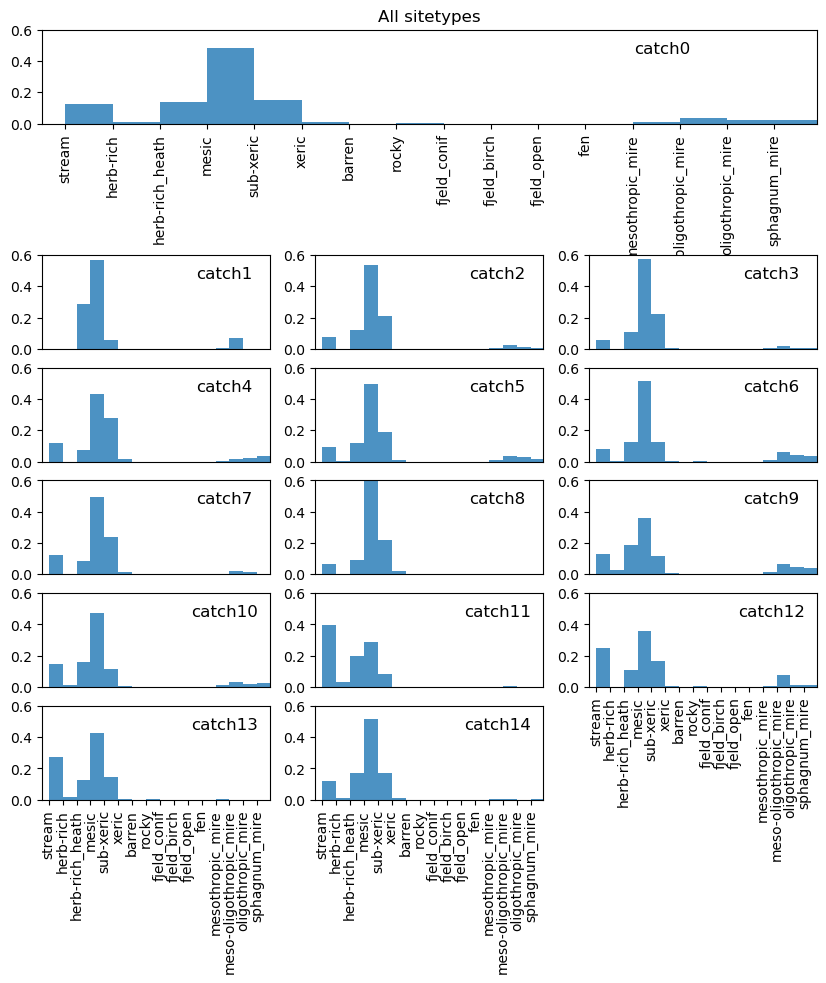

In [24]:
data = sitetype.copy()

x = np.arange(0,17,1)
labels = ['stream', 'herb-rich', 'herb-rich_heath', 'mesic', 'sub-xeric', 'xeric', 'barren', 'rocky', 'fjeld_conif',
             'fjeld_birch', 'fjeld_open', 'fen', 'mesothropic_mire', 'meso-oligothropic_mire', 'oligothropic_mire',
             'sphagnum_mire', 'no_forest']

#data = data[np.isfinite(data)]
data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(7, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
ax4 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])
ax7 = fig.add_subplot(gs[3, 2])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[4, 2])
ax11 = fig.add_subplot(gs[5, 0])
ax12 = fig.add_subplot(gs[5, 1])
ax13 = fig.add_subplot(gs[5, 2])
ax14 = fig.add_subplot(gs[6, 0])
ax15 = fig.add_subplot(gs[6, 1])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

#bins = (len(np.unique(data)))*2
bins=np.histogram(np.hstack((data)), bins=16)[1] #get the bin edges

for i in range(len(axes)):
    catchno = int(cs[i])
    if i == 0:
        plot_data = data[np.isfinite(cmask)]
    else:
        plot_data = data[np.where(cmask == catchno)]
    axes[i].hist(plot_data, bins=bins, alpha=0.8, density=True)
    
    mean = round(np.nanmean(plot_data),1)

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xticks(x, labels, rotation='vertical')
        
    axes[i].set_xlim([-0.5,15.9])
    axes[i].set_ylim([0.0,0.6])
    
    axes[i].text(0.8, 0.8,f'catch{catchno}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)

ax1.set_title('All sitetypes')

#plt.savefig(f'sitetype_all.png',bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'Forest sitetypes')

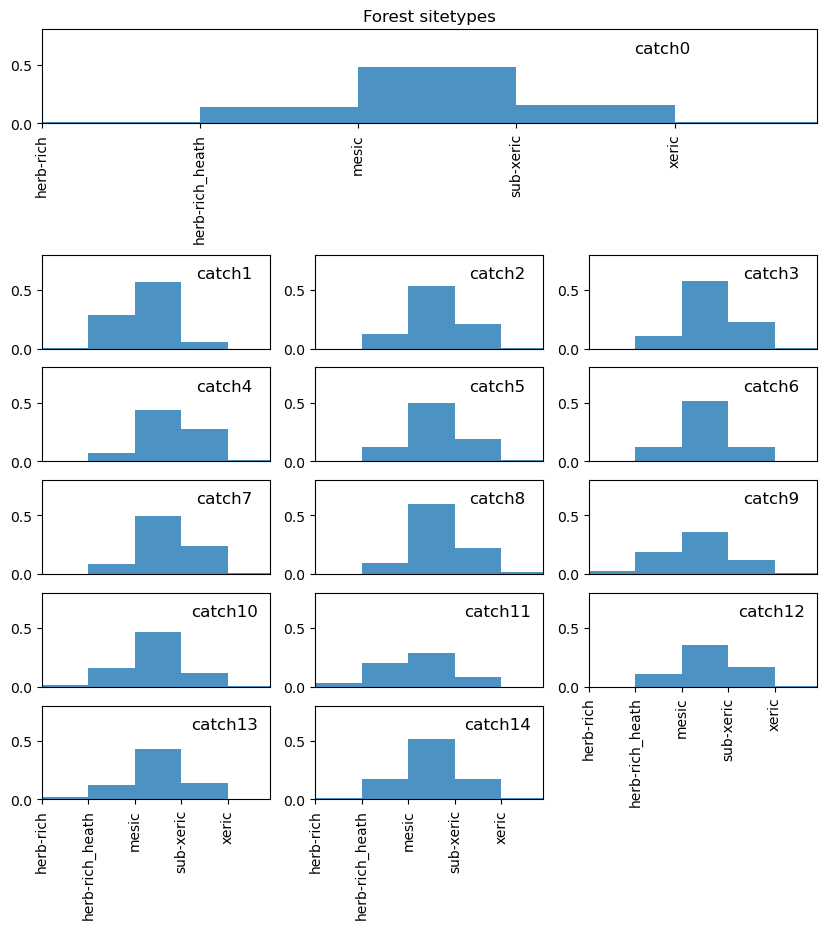

In [26]:
data = sitetype.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)

x = np.arange(0,17,1)
labels = ['stream', 'herb-rich', 'herb-rich_heath', 'mesic', 'sub-xeric', 'xeric', 'barren', 'rocky', 'fjeld_conif',
             'fjeld_birch', 'fjeld_open', 'fen', 'mesothropic_mire', 'meso-oligothropic_mire', 'oligothropic_mire',
             'sphagnum_mire', 'no_forest']

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(7, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
ax4 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])
ax7 = fig.add_subplot(gs[3, 2])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[4, 2])
ax11 = fig.add_subplot(gs[5, 0])
ax12 = fig.add_subplot(gs[5, 1])
ax13 = fig.add_subplot(gs[5, 2])
ax14 = fig.add_subplot(gs[6, 0])
ax15 = fig.add_subplot(gs[6, 1])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

#bins = (len(np.unique(data)))*2
bins=np.histogram(np.hstack((data)), bins=16)[1] #get the bin edges

for i in range(len(axes)):
    catchno = int(cs[i])
    if i == 0:
        plot_data = data[np.isfinite(cmask)]
    else:
        plot_data = data[np.where(cmask == catchno)]
    axes[i].hist(plot_data, bins=bins, alpha=0.8, density=True)

    
    mean = round(np.nanmean(plot_data),1)

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xticks(x, labels, rotation=90)
        #axes[i].set_xlabel('sitetype')

    axes[i].set_xlim([1,5.9])
    axes[i].set_ylim([0.0,0.8])
    
    axes[i].text(0.8, 0.8,f'catch{catchno}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)
    
ax1.set_title('Forest sitetypes')

#plt.savefig(f'sitetype_forest.png',bbox_inches='tight', dpi=300)

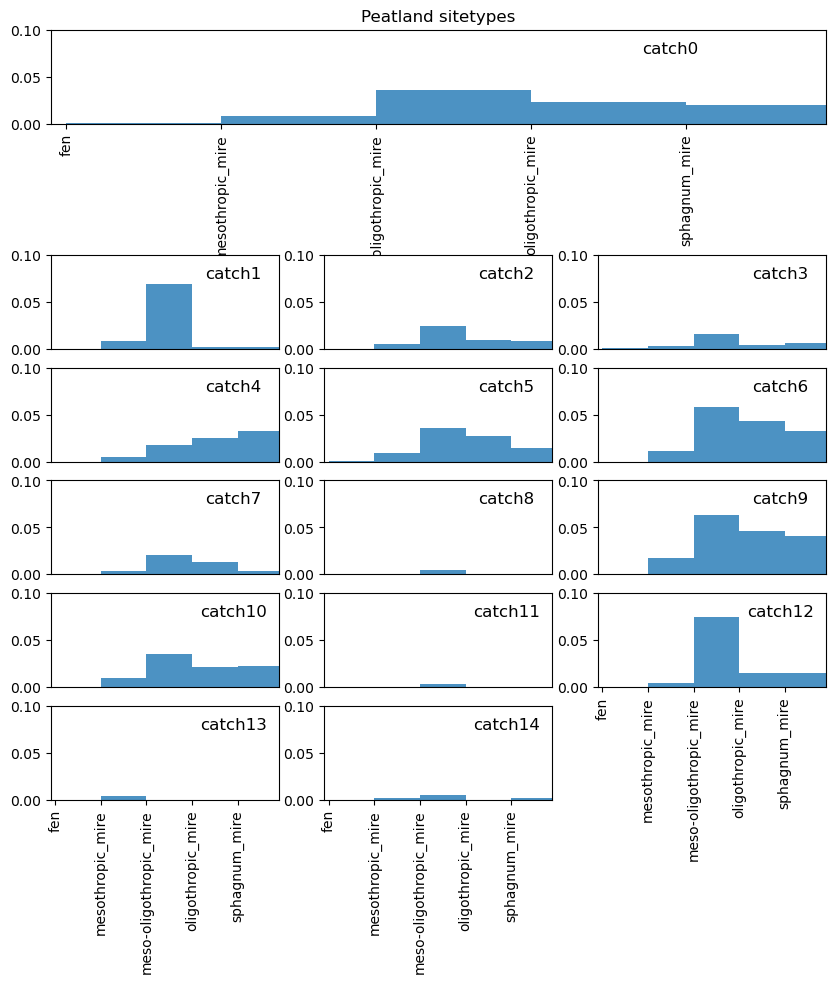

In [27]:
data = sitetype.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)

x = np.arange(0,17,1)
labels = ['stream', 'herb-rich', 'herb-rich_heath', 'mesic', 'sub-xeric', 'xeric', 'barren', 'rocky', 'fjeld_conif',
             'fjeld_birch', 'fjeld_open', 'fen', 'mesothropic_mire', 'meso-oligothropic_mire', 'oligothropic_mire',
             'sphagnum_mire', 'no_forest']

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(7, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
ax4 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])
ax7 = fig.add_subplot(gs[3, 2])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[4, 2])
ax11 = fig.add_subplot(gs[5, 0])
ax12 = fig.add_subplot(gs[5, 1])
ax13 = fig.add_subplot(gs[5, 2])
ax14 = fig.add_subplot(gs[6, 0])
ax15 = fig.add_subplot(gs[6, 1])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

#bins = (len(np.unique(data)))*2
bins=np.histogram(np.hstack((data)), bins=16)[1] #get the bin edges

for i in range(len(axes)):
    catchno = int(cs[i])
    if i == 0:
        plot_data = data[np.isfinite(cmask)]
    else:
        plot_data = data[np.where(cmask == catchno)]
    axes[i].hist(plot_data, bins=bins, alpha=0.8, density=True)

    
    mean = round(np.nanmean(plot_data),1)

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xticks(x, labels, rotation=90)
        
    axes[i].set_xlim([10.9,15.9])
    axes[i].set_ylim([0.0,0.1])
    axes[i].text(0.8, 0.8,f'catch{catchno}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)

ax1.set_title('Peatland sitetypes')

plt.savefig(f'sitetype_mire.png',bbox_inches='tight', dpi=300)

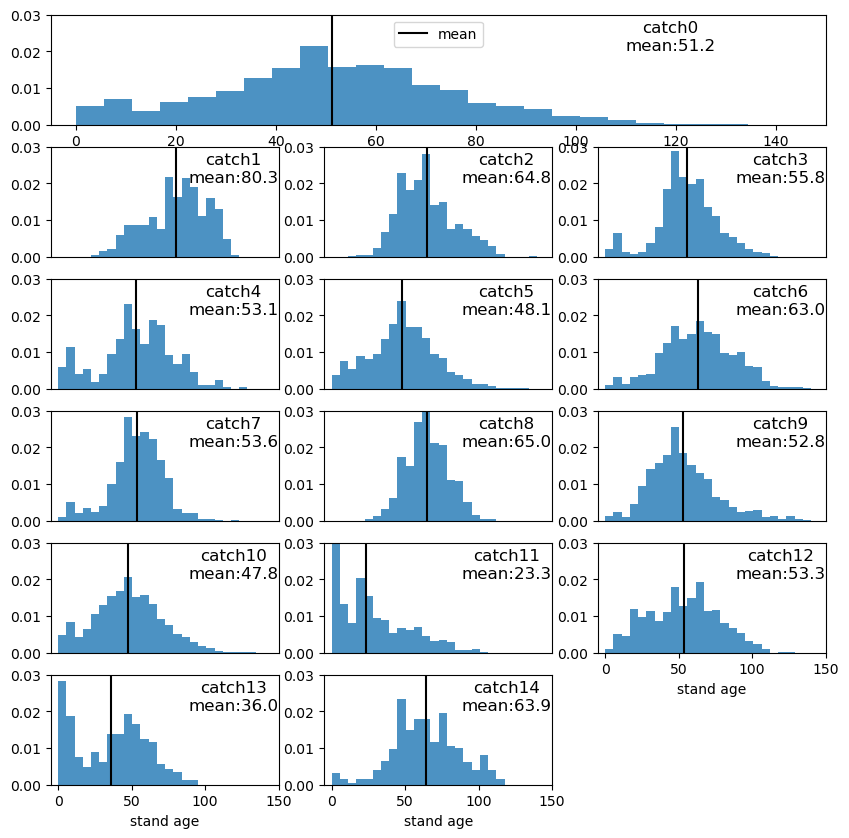

In [28]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(6, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])
ax14 = fig.add_subplot(gs[5, 0])
ax15 = fig.add_subplot(gs[5, 1])

data = age.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

#bins=25
bins=np.histogram(np.hstack((data)), bins=25)[1] #get the bin edges

for i in range(len(axes)):
    catchno = int(cs[i])
    
    if i == 0:
        plot_data = data[np.isfinite(cmask)]
    else:
        plot_data = data[np.where(cmask == catchno)]
    axes[i].hist(plot_data, alpha=0.8, bins=bins, density=True)
    
    mean = round(np.nanmean(plot_data),1)
    axes[i].axvline(x=mean, color='black', label='mean')

    axes[i].set_xlim([-5,150])
    axes[i].set_ylim([0,0.03])

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xlabel('stand age')

    axes[i].text(0.8, 0.8,f'catch{catchno}\nmean:{mean}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)
    if i == 0:
        axes[i].legend(loc='upper center')
plt.savefig(f'age.png',bbox_inches='tight', dpi=300)

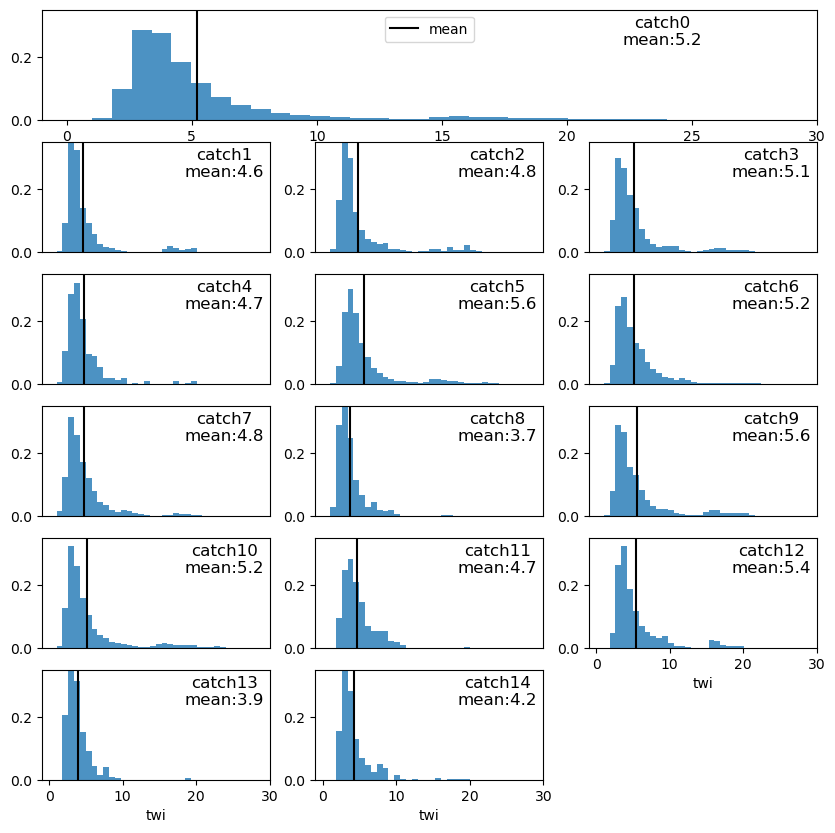

In [37]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(6, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])
ax14 = fig.add_subplot(gs[5, 0])
ax15 = fig.add_subplot(gs[5, 1])

data = twi.copy()
data[data == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

#bins=25
bins=np.histogram(np.hstack((data)), bins=30)[1] #get the bin edges

for i in range(len(axes)):
    catchno = int(cs[i])

    
    if i == 0:
        plot_data = data[np.isfinite(cmask)]
    else:
        plot_data = data[np.where(cmask == catchno)]
    axes[i].hist(plot_data, alpha=0.8, bins=bins, density=True)
    
    mean = round(np.nanmean(plot_data),1)
    axes[i].axvline(x=mean, color='black', label='mean')

    axes[i].set_xlim([-1,30])
    axes[i].set_ylim([0,0.35])
    
    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xlabel('twi')

    axes[i].text(0.8, 0.8,f'catch{catchno}\nmean:{mean}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)
    
    if i == 0:
        axes[i].legend(loc='upper center')

#plt.savefig(f'twi.png',bbox_inches='tight', dpi=300)

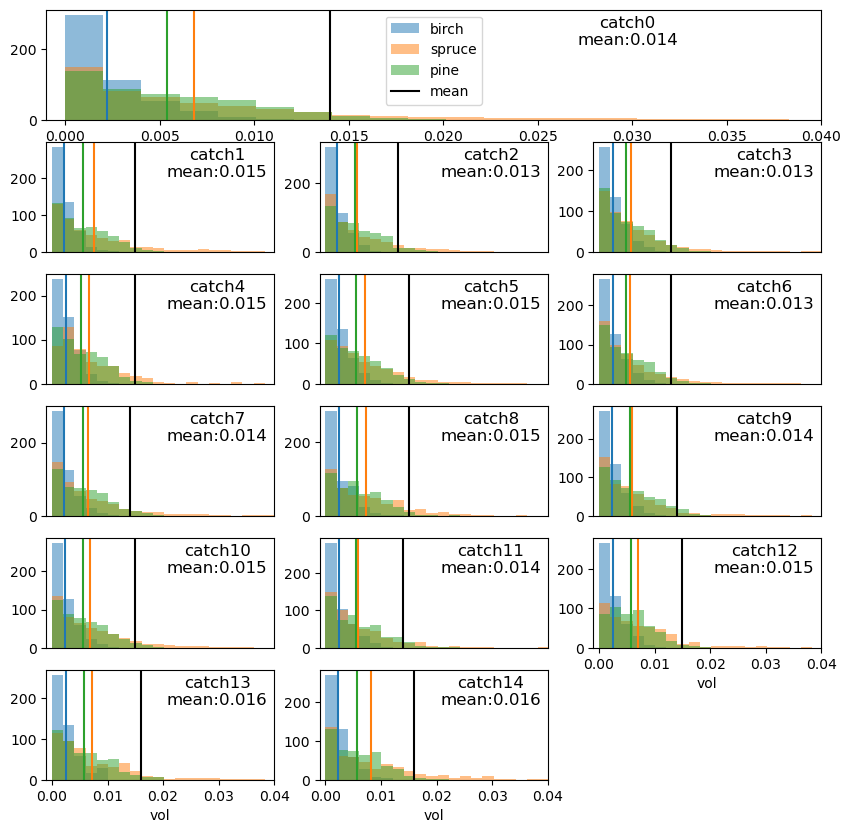

In [51]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(6, 3)
ax1 = fig.add_subplot(gs[0, 0:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])
ax14 = fig.add_subplot(gs[5, 0])
ax15 = fig.add_subplot(gs[5, 1])

data1 = vol_birch.copy()
data2 = vol_spruce.copy()
data3 = vol_pine.copy()
data = data1+data2+data3

data1[data1 == -9999] = np.nan
data2[data2 == -9999] = np.nan
data3[data3 == -9999] = np.nan
cmask[cmask == -9999] = np.nan

data = data[np.isfinite(data)]
data1 = data1[np.isfinite(data1)]
data2 = data2[np.isfinite(data2)]
data3 = data3[np.isfinite(data3)]
cmask = cmask[np.isfinite(cmask)]

cs = np.unique(cmask)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

#bins=25
bins=np.histogram(np.hstack((data1,data2,data3)), bins=25)[1] #get the bin edges
#bins=np.histogram(np.hstack((data2,data3)), bins=25)[1] #get the bin edges

for i in range(len(axes)):
    catchno = int(cs[i])

    
    if i == 0:
        plot_data = data#[np.isfinite(cmask)]
        plot_data1 = data1#[np.isfinite(cmask)]
        plot_data2 = data2#[np.isfinite(cmask)]
        plot_data3 = data3#[np.isfinite(cmask)]
    else:
        plot_data = data[np.where(cmask == catchno)]
        plot_data1 = data1[np.where(cmask == catchno)]
        plot_data2 = data2[np.where(cmask == catchno)]
        plot_data3 = data3[np.where(cmask == catchno)]
        
    axes[i].hist(plot_data1, alpha=0.5, bins=bins, label='birch', density=True)
    axes[i].hist(plot_data2, alpha=0.5, bins=bins, label='spruce', density=True)
    axes[i].hist(plot_data3, alpha=0.5, bins=bins, label='pine', density=True)

    mean = round(np.nanmean(plot_data),3)
    mean1 = np.nanmean(plot_data1)
    mean2 = np.nanmean(plot_data2)
    mean3 = np.nanmean(plot_data3)

    axes[i].axvline(x=mean, color='black', label='mean')
    axes[i].axvline(x=mean1, color='tab:blue')
    axes[i].axvline(x=mean2, color='tab:orange')
    axes[i].axvline(x=mean3, color='tab:green')
    
    axes[i].set_xlim([-0.001,0.04])
    #axes[i].set_ylim([-0.001,0.04])

    if i not in [0,12,13,14]:
        axes[i].set_xticks([])
    else:
        axes[i].set_xlabel('vol')
        
    axes[i].text(0.75, 0.8,f'catch{catch}\nmean:{mean}', size=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[i].transAxes)

    if i == 0:
        axes[i].legend(loc='upper center')

plt.savefig(f'vol.png',bbox_inches='tight', dpi=300)